<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-proditorIF/blob/main/Ago25-26/DGrad_McL_BRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Machine Learning/Alma
 ###  Método del gradiente descendiente
En este método se inicia con un vector de pesos  arbitrario y se aplica el gradiente de la función costo para encontrar el mínimo ajustando el valor de los pesos, realizando saltos de ajuste determinados por el valor del parámetro $\alpha$. \
Función costo: $L=\frac{1}{2N}∑(f(x,W)-t)^2$ \
Vector de pesos incial $\quad \quad \vec{w} =\begin{pmatrix}
w_0\\  
w_2\\
\end{pmatrix}$\
Ajuste de pesos \
$w_0=w_0-\frac{\partial L}{\partial w_0}$\
$w_1=w_1-\frac{\partial L}{\partial w_1}$
Se repite el ajuste de forms iterativa hasta encontrar el minimo de la función costo.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
El vector W encontrado es [11.14109659 -0.05332354]


Text(0, 0.5, 'Velocidad')

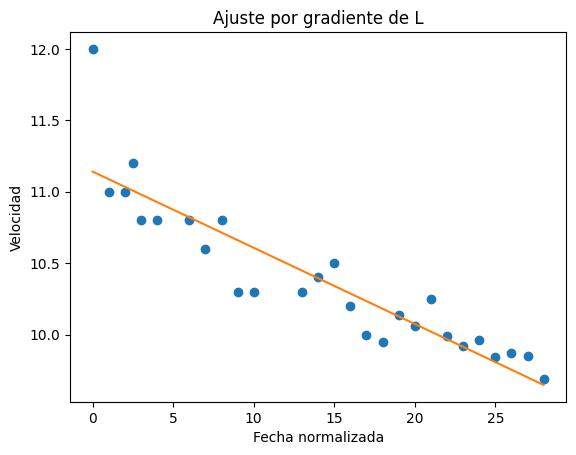

In [29]:
#Caso simple para grado 1
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
file ="/content/drive/MyDrive/Machine_Learn/olympic100m_men.txt"
data=np.loadtxt(file,delimiter=",").T
#Asigamos los datos
x=data[0]
t=data[1]
# Se normalizan los datos
x = (x - 1896) / 4
#Se Define la función que calcula las derivas de L en base a los pesos
def DW(x, y,W):
  N= 1/len(x)
  #Se construye la matriz
  X=np.vstack([np.ones_like(x)])
  for i in range(1,len(W)):
    Xa=np.vstack([x**i])
    X=np.concatenate([X, Xa])
  #Se calculan las derivadas
  Dw0=(N)*(np.sum((X.T @ W-t)))
  DW1=(N)*(np.sum((X.T @ W-t) @ X.T))
  return Dw0,DW1
#Función que cualcula el costo en base a los pesos prprocionados
def cost(x, y,W):
  N= 1/len(x)
  #Se construye la matriz
  X=np.vstack([np.ones_like(x)])
  for i in range(1,len(W)):
    Xa=np.vstack([x**i])
    X=np.concatenate([X, Xa])
  #Se calcula el valor de la función costo
  Cost=(N)*(np.sum((X.T @ W-t)**2))
  return cost
#Función para el gradiente
def Lgrad1 (x,t,W,a):
  C= cost(x,t,W)
  for i in range(100000):
    D=DW(x,t,W)
    #print(W)
    W[0]-=a*D[0]
    W[1]-=a*D[1]
W=np.zeros(2)
W[0]=0
W[1]=0
al=.0009
Yg=Lgrad1(x,t,W,al)
print("El vector W encontrado es",W)
Y=W[0]+W[1]*x
plt.title("Ajuste por gradiente de L")
plt.plot(x,t,'o')
plt.plot(x,Y,)
plt.xlabel("Fecha normalizada")
plt.ylabel("Velocidad")



Text(0, 0.5, 'Velocidad')

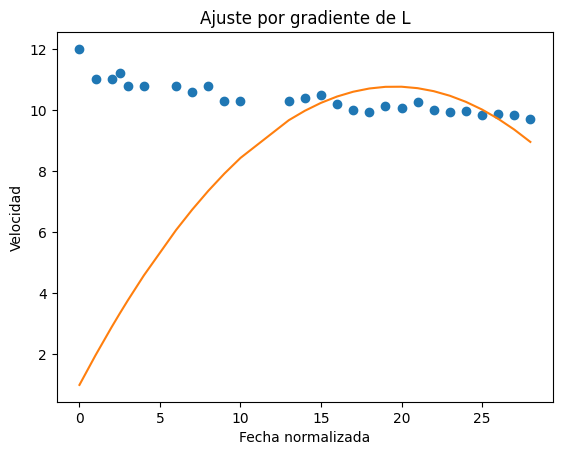

In [133]:
#Implementación pendiente
def DWn(x, y,Wa):
  N= 1/len(x)
  DW=np.zeros(len(Wa)) #Arreglo para almecenar las derivadas
  #Se construye la matriz
  X=np.vstack([np.ones_like(x)])
  for i in range(1,len(Wa)):
    Xa=np.vstack([x**i])
    X=np.concatenate([X, Xa])
  #Se calculan las derivadas
  for i in range(0,len(Wa)):
    DW[i]=(N)*(np.sum((X.T @ Wa-t)@(X.T)**i))
  return DW
#Ordenes superiores
def Lgradn (x,t,Wa,a):
  C= cost(x,t,Wa)
  for i in range(100):
    D=DWn(x,t,Wa)
    for j in range(len(Wa)):
       Wa[j]-=a*D[j]
#Función para el modelo
def modY(x,y,Wa):
  Y=0
  for i in range(len(Wa)):
    Y+=Wa[i]*x**i
  return Y
W8=np.ones(3)
alg=0.000000003
grad8=Lgradn(x,t,W8,alg)
Y8=W8[0]+W8[1]*x+W8[2]*x**2
plt.title("Ajuste por gradiente de L")
plt.plot(x,t,'o')
plt.plot(x,Y8)
plt.xlabel("Fecha normalizada")
plt.ylabel("Velocidad")